In [ ]:
#知识点
#1.直方图
#2.lambda函数

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#读取数据
df=pd.read_excel("D:/2022_py_code/03代码 (2)/03代码/data/02确诊情况统计.xlsx",sheet_name='全国')

In [10]:
#统计基本信息
sizes=df["性别"].value_counts()#对性别进行统计

In [11]:
labels=sizes.index

In [12]:
df_age=df['年龄'].astype(float)
#年龄数据格式变换成浮点数

In [13]:
print(df_age.describe())#查看均值、标准差等

count    373.000000
mean      45.831099
std       17.709450
min        1.000000
25%       33.000000
50%       44.000000
75%       59.000000
max       94.000000
Name: 年龄, dtype: float64


([<matplotlib.patches.Wedge at 0x1a1568b3fd0>,
 [Text(-0.23443906162493608, 1.0747270939100864, '男'),
  Text(0.23443906162493572, -1.0747270939100864, '女')],
 [Text(-0.12787585179541966, 0.5862147784964107, '56.8%'),
  Text(0.12787585179541947, -0.5862147784964107, '43.2%')])

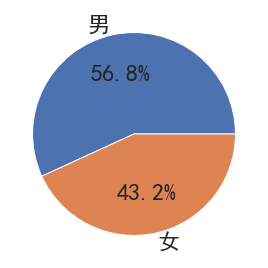

In [14]:
#进行绘图——饼图
plt.figure(figsize=(10,10))#绘图大小为10*10
sns.set(font_scale=2,font='SimHei')#黑体，2号
plt.subplot(1,2,1)#性别分布饼图
plt.pie(sizes,labels=labels,autopct='%1.1f%%')#labels是标注，autopct用于显示数字


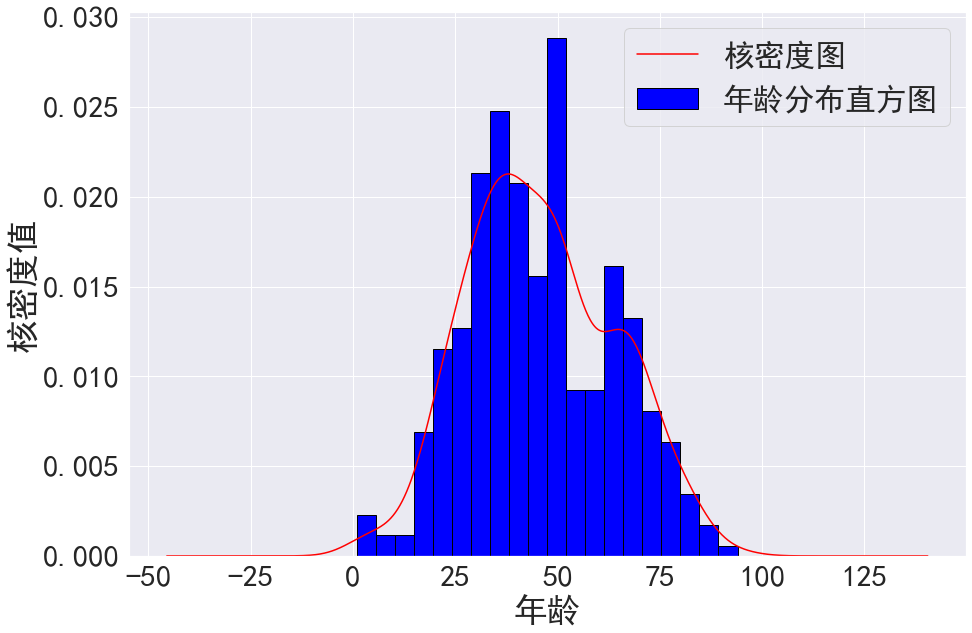

In [15]:
#进行绘图——直方图
plt.figure(figsize=(15,10))
sns.set(font_scale=2.8,font='SimHei')
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
df_age.plot(kind="hist",bins=20,color="blue",edgecolor="black", density=True, label='年龄分布直方图')#直方图     
df_age.plot(kind="kde",color="red",label='核密度图')#加核密度图
plt.xlabel('年龄')#设置横坐标名称
plt.ylabel('核密度值')#设置纵坐标名称
# plt.title("年龄分布")#添加标题
plt.legend()

In [16]:
df_incubation=df[['感染时间','发病时间']]

In [17]:
df_incubation1 = df_incubation.dropna()#删除缺失行

In [18]:
df_incubation1['incubation'] = df_incubation1['发病时间'] - df_incubation1['感染时间']#计算潜伏期

<ipython-input-18-17b0aec192ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incubation1['incubation'] = df_incubation1['发病时间'] - df_incubation1['感染时间']#计算潜伏期


In [20]:
df_incubation1['incubation'] = df_incubation1['incubation'].apply(lambda x: x.days)  #将'incubation'列中的“days”删除

AttributeError: 'int' object has no attribute 'days'

In [21]:
#lambda原型为：lambda 参数:操作(参数)

#lambda函数也叫匿名函数，即没有具体名称的函数，它允许快速定义单行函数，可以用在任何需要函数的地方。这区别于def定义的函数。

In [22]:
print(df_incubation1['incubation'].describe())#查看均值、最大值、最小值等等

count    29.000000
mean      6.413793
std       4.379475
min       0.000000
25%       4.000000
50%       5.000000
75%       8.000000
max      22.000000
Name: incubation, dtype: float64


In [23]:
#查看确诊时间


In [24]:
df_diagnosis = df[['发病时间','确诊时间']]

In [25]:
df_diagnosis1 = df_diagnosis.dropna()#删除缺失行

In [26]:
df_diagnosis1['发病-确诊时间'] = df_diagnosis1['确诊时间'] - df_diagnosis1['发病时间']#计算确诊时间

<ipython-input-26-a494ce655829>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnosis1['发病-确诊时间'] = df_diagnosis1['确诊时间'] - df_diagnosis1['发病时间']#计算确诊时间


In [27]:
df_diagnosis1['发病-确诊时间'] = df_diagnosis1['发病-确诊时间'].apply(lambda x: x.days)
#将'incubation'列中的“days”删除

<ipython-input-27-e87f798ad752>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnosis1['发病-确诊时间'] = df_diagnosis1['发病-确诊时间'].apply(lambda x: x.days)


In [28]:
print(df_diagnosis1['发病-确诊时间'].describe())#查看均值、最大值、最小值等等


count    171.000000
mean       6.473684
std        3.315411
min        0.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       17.000000
Name: 发病-确诊时间, dtype: float64


In [29]:
#查看死亡时间
#和上面操作相同
df_death = df[['入院时间','死亡时间']]
df_death1 = df_death.dropna()#删除缺失行
df_death1['入院-死亡时间'] = df_death1['死亡时间'] - df_death1['入院时间']#计算确诊时间
df_death1['入院-死亡时间'] = df_death1['入院-死亡时间'].apply(lambda x: x.days) #将'incubation'列中的“days”删除
print(df_death1['入院-死亡时间'].describe())#查看均值、最大值、最小值等等

count    33.000000
mean      9.757576
std       9.848954
min       1.000000
25%       5.000000
50%       8.000000
75%      11.000000
max      56.000000
Name: 入院-死亡时间, dtype: float64


<ipython-input-29-4d6a57f67cfd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death1['入院-死亡时间'] = df_death1['死亡时间'] - df_death1['入院时间']#计算确诊时间
<ipython-input-29-4d6a57f67cfd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death1['入院-死亡时间'] = df_death1['入院-死亡时间'].apply(lambda x: x.days)


In [30]:
#作图
sns.set(font_scale=1.8,font='SimHei') #黑体，1.8号

In [31]:
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [32]:
plt.figure(figsize=(30,7))

<Figure size 2160x504 with 0 Axes>

<Figure size 2160x504 with 0 Axes>

In [33]:
plt.subplots_adjust(wspace=0.2, hspace=0.3)

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

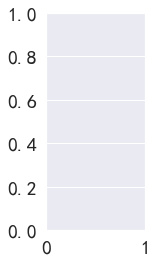

In [34]:
plt.subplot(1,3,1)#潜伏期直方图

<AxesSubplot:ylabel='Frequency'>

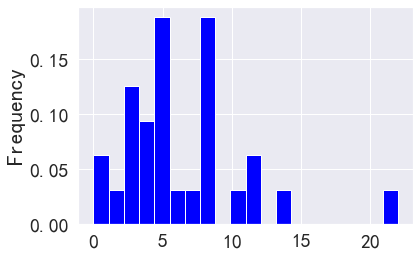

In [36]:
df_incubation1['incubation'].plot(kind="hist",bins=20,color="blue",density=True)#直方图 

Text(0.5, 1.0, '潜伏期')

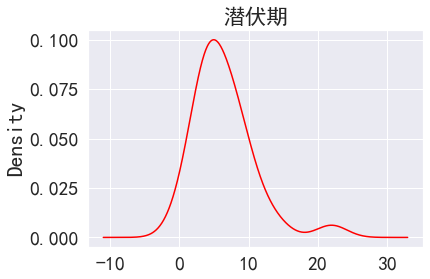

In [42]:
df_incubation1['incubation'].plot(kind="kde",color="red")#加核密度图
plt.title("潜伏期")#添加标题

<AxesSubplot:ylabel='Frequency'>

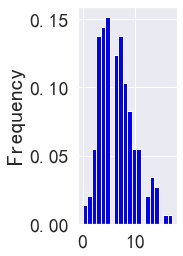

In [43]:
plt.subplot(1,3,2)#发病—确诊时间直方图
df_diagnosis1['发病-确诊时间'].plot(kind="hist",bins=20,color="blue",density=True)#直方图   

Text(0.5, 1.0, '发病-确诊时间')

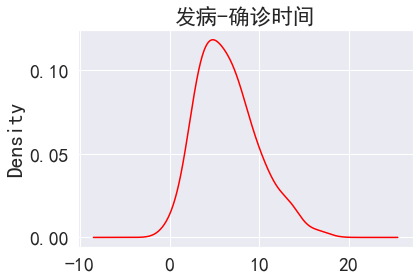

In [44]:
df_diagnosis1['发病-确诊时间'].plot(kind="kde",color="red")#加核密度图
plt.title("发病-确诊时间")#添加标题

Text(0.5, 1.0, '入院-死亡时间')

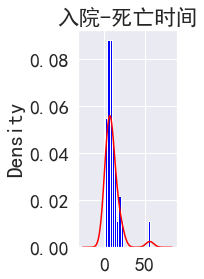

In [45]:
plt.subplot(1,3,3)#入院——死亡时间直方图
df_death1['入院-死亡时间'].plot(kind="hist",bins=20,color="blue",density=True)#直方图     
df_death1['入院-死亡时间'].plot(kind="kde",color="red")#加核密度图
plt.title("入院-死亡时间")#添加标题